In [3]:
using Plots
using Random
using StaticArrays

In [1]:
mutable struct Game
    grid::Matrix
    isover::Bool
    niter::Int
end

In [25]:
1 < 2< 3

true

In [43]:
function rule(current, nneighbor)
    if current==0
        if nneighbor != 3
            return 0
        end
        return 1
    elseif 2 <= nneighbor <=3
        return 1
    end
    return 0
end

rule (generic function with 1 method)

In [109]:
function update(g::Game)
    
    g.niter += 1
    
    newstate = zeros(size(g.grid))
    sx, sy = strides(g.grid)
    
    for idx in eachindex(g.grid)
        # @show mod(idx, sy)
        if mod(idx, sy) != 0 && mod(idx, sy) != 1
            nidx = [
                idx - sy - 1, idx - sy, idx - sy + 1,
                idx      - 1          , idx      + 1,
                idx + sy - 1, idx + sy, idx + sy + 1,
            ]
        elseif mod(idx, sy)==0
            nidx = [
                idx - sy - 1, idx - sy,
                idx      - 1          ,
                idx + sy - 1, idx + sy,
            ]
        else
            # @show idx
            nidx = [
                idx - sy, idx - sy + 1,
                idx      + 1,
                idx + sy, idx + sy + 1,
            ]
        end
            
        nidx = nidx[nidx .> 0 .&& nidx .<= prod(size(g.grid))]
        nneighbor = sum(g.grid[nidx])
        newstate[idx] = rule(g.grid[idx], nneighbor)
        # @show nidx
    end
    
    if sum(newstate.!==g.grid)==0
        g.isover = true
    end
    
    g.grid = newstate
    
    
end

update (generic function with 1 method)

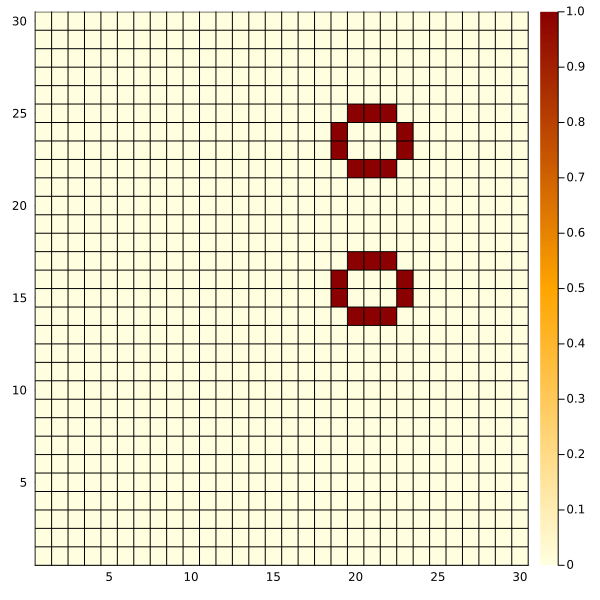

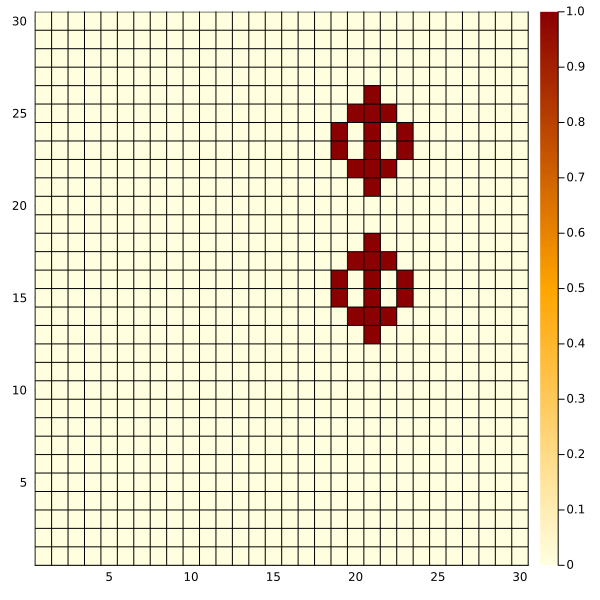

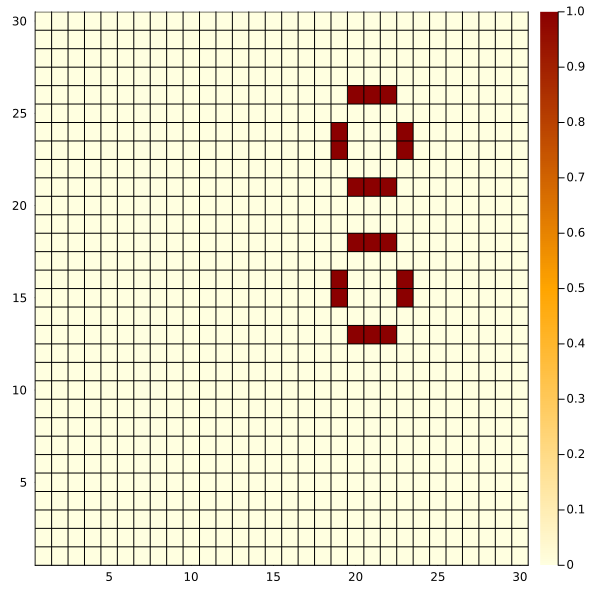

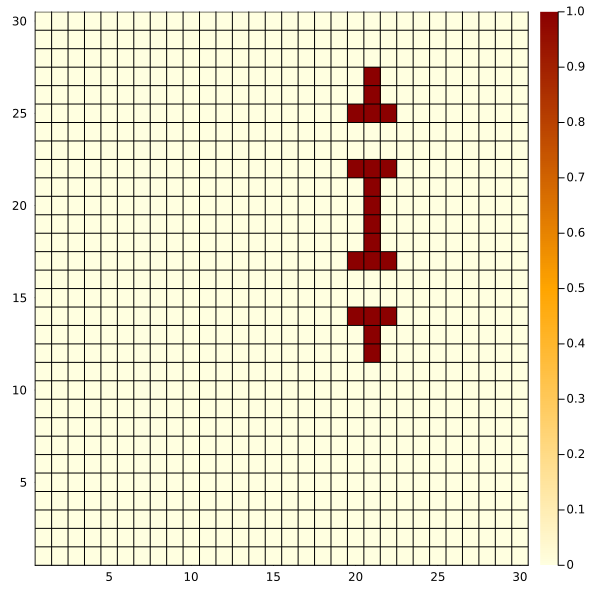

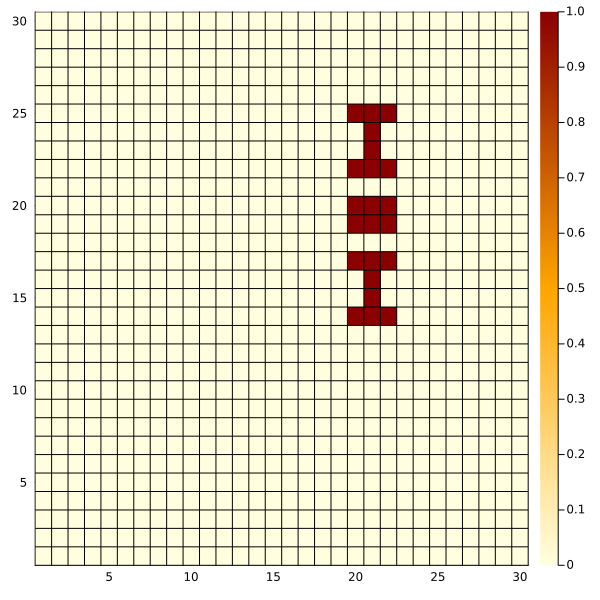

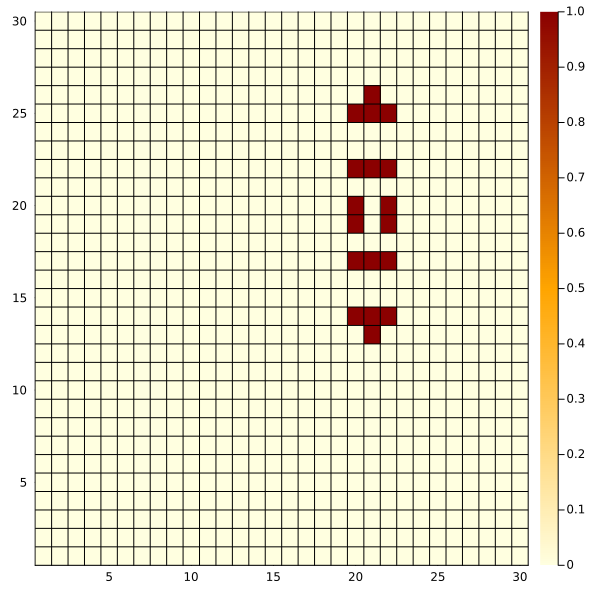

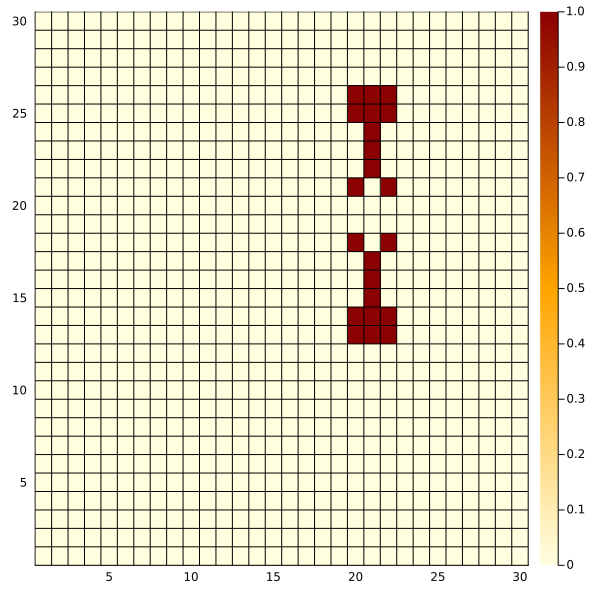

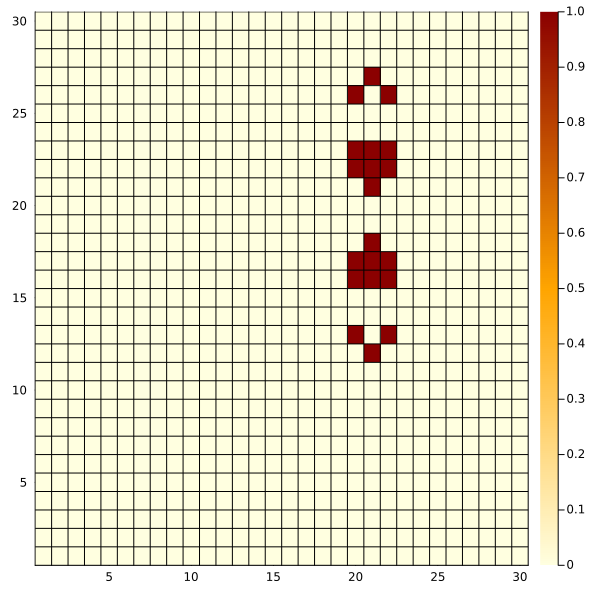

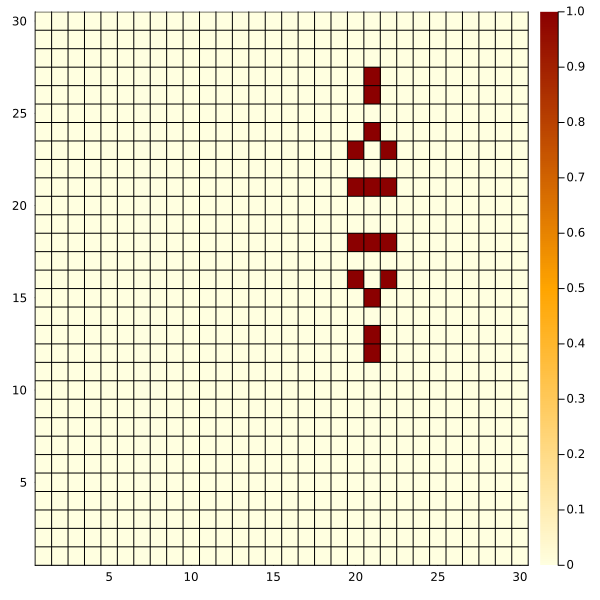

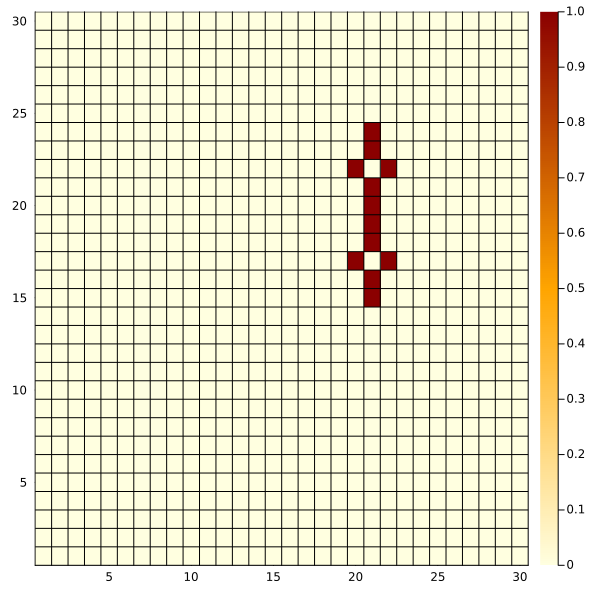

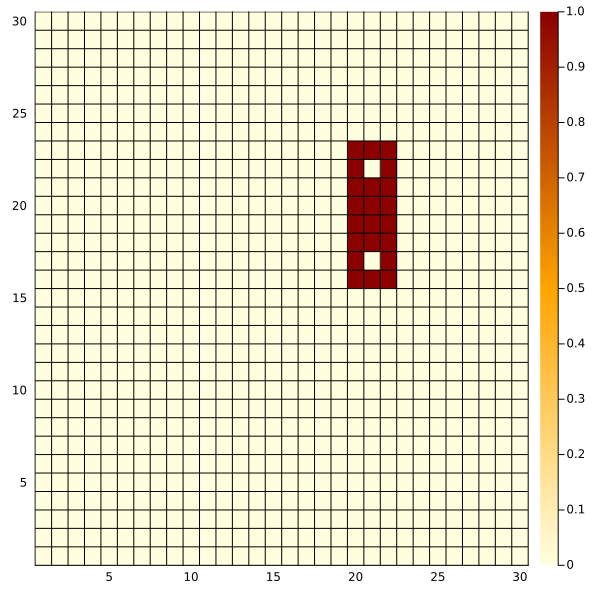

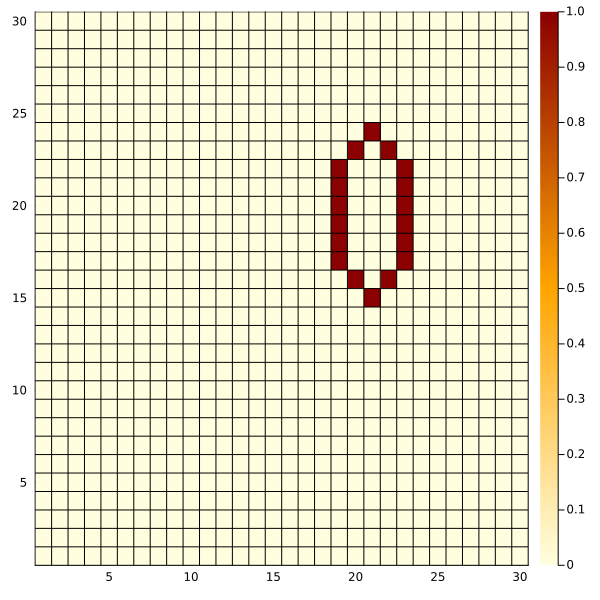

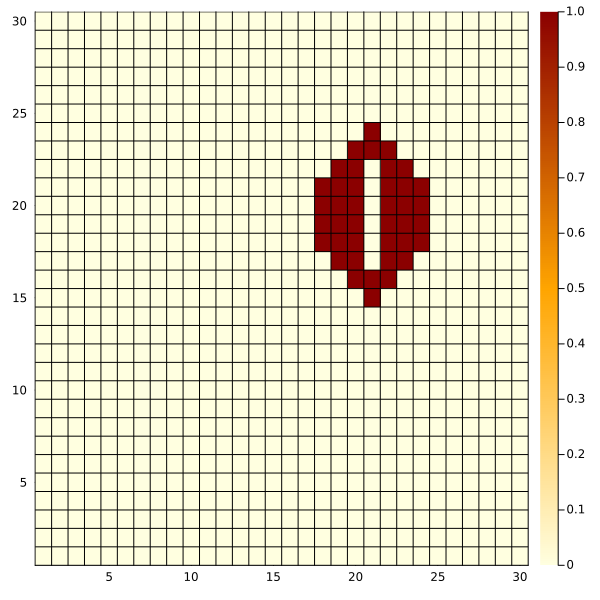

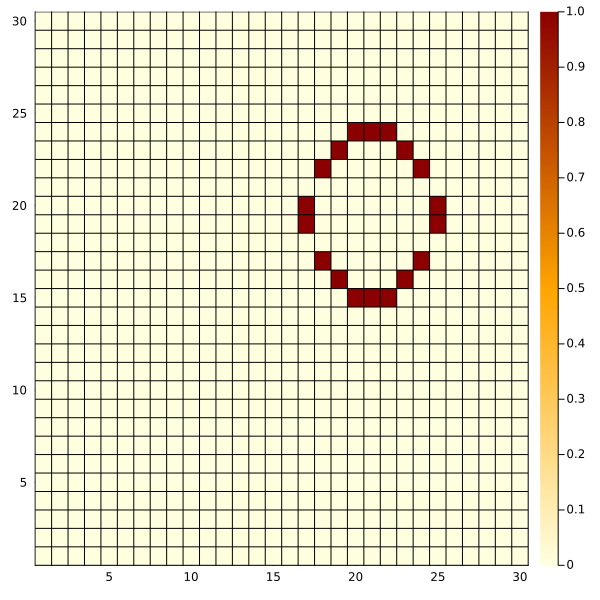

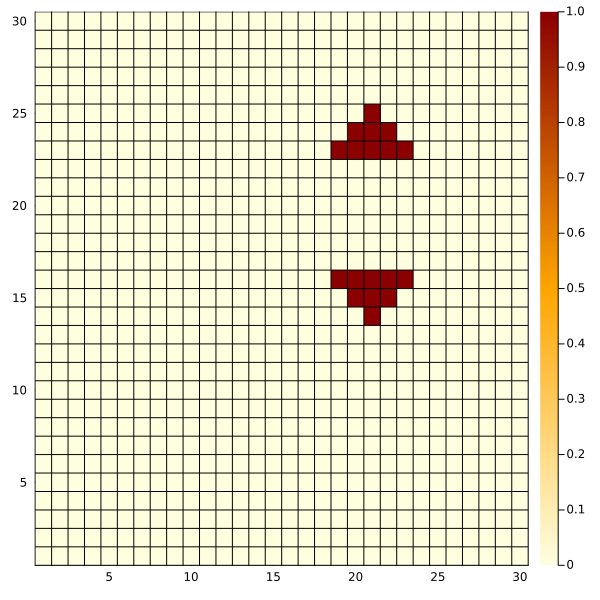

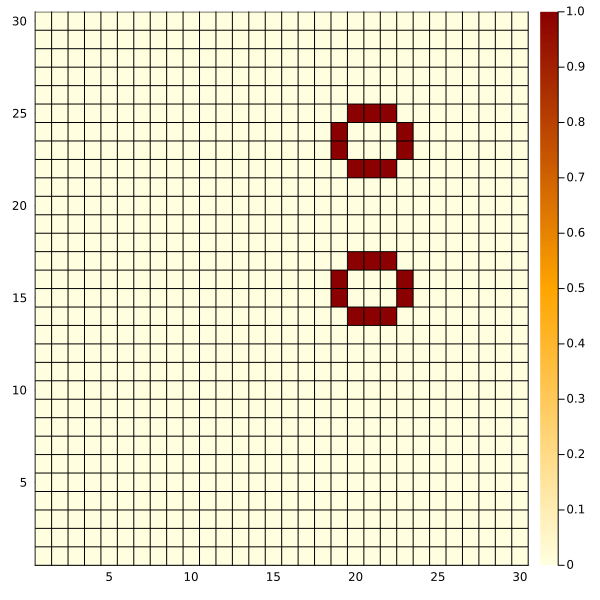

In [150]:
idxmax = 3

g = zeros(30, 30)
# Shape 1
g[15, 8] = 1
g[16, 8] = 1

g[14, 9] = 1
g[14, 10] = 1
g[14, 11] = 1

g[17, 9] = 1
g[17, 10] = 1
g[17, 11] = 1

g[15, 12] = 1
g[16, 12] = 1

# Shape 2
g[8, 8] = 1
g[7, 8] = 1

g[6, 9] = 1
g[6, 10] = 1
g[6, 11] = 1

g[9, 9] = 1
g[9, 10] = 1
g[9, 11] = 1

g[8, 12] = 1
g[7, 12] = 1

game = Game(g, false, 0)
game.grid

# while ~game.isover && game.niter < idxmax
#     plt = plot(clims=(0,1), size=(600, 600), xlims=(0.5, 30.5), ylims=(0.5, 30.5))
#     heatmap!(plt, reverse(game.grid), cmap=:heat)
#     vline!(0.5:(size(game.grid, 1)+0.5), c=:black, label="")
#     hline!(0.5:(size(game.grid, 2)+0.5), c=:black, label="")
#     display(plt)
#     update(game)
# end

# anim = @animate while ~game.isover && game.niter < idxmax
#     update(game)
#     plt = plot(clims=(0,1), size=(600, 600))
#     heatmap!(plt, reverse(game.grid), cmap=:heat)
# end

# gif(anim, fps=2)